In [71]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot  as plt
import seaborn as sns

In [72]:
df_train = pd.read_csv("../DATA_sets/titanik_train.csv", index_col='PassengerId')
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df_train.shape

(891, 11)

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [74]:
# value_counts() БРОИ ПОВТОРЕНИЯТА!!!
df_train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# Clean and wrangle the data

# Check for Nan Values

In [75]:
df_train = df_train.drop(columns=['Name','Cabin','Ticket'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [79]:
df_train.isnull().sum().sort_values()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [80]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [82]:
df_train = df_train.dropna(axis=0, subset='Embarked')
df_train.shape

(889, 8)

In [83]:
df_train.isnull().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [84]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:

df = df_train 
# def categories_to_numbers(df):
# df['Sex'].dtype == "object"
# df['Sex'] =np.where(df['Sex'] =='male', 1, 0)
# df.head()
df["Sex"].dtype == "object"
mapping_1 = {"male":1, "female":0}
df["Sex"] = df["Sex"].map(mapping_1)
#######
df["Embarked"].dtype == 'object'
mapping_2 = {'S':0, "C":1, "Q":2}
df["Embarked"]=df["Embarked"].map(mapping_2)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [86]:
df.info()
# df_corr = df.corr()
# sns.heatmap(df_corr,annot=True, cmap="Reds")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [88]:
# df_train.Ticket.value_counts()

<AxesSubplot: >

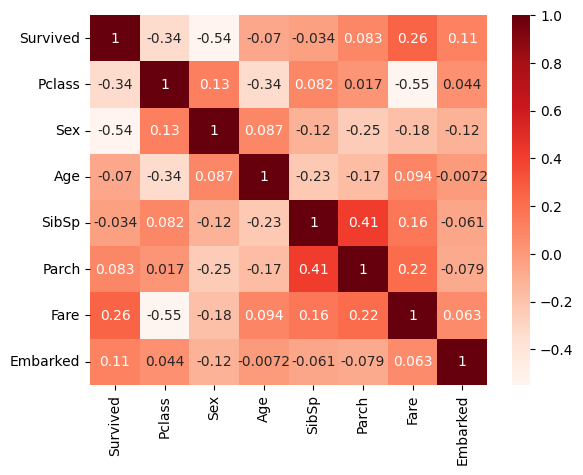

In [90]:
df_corr = df.corr()
sns.heatmap(df_corr,annot=True, cmap="Reds")

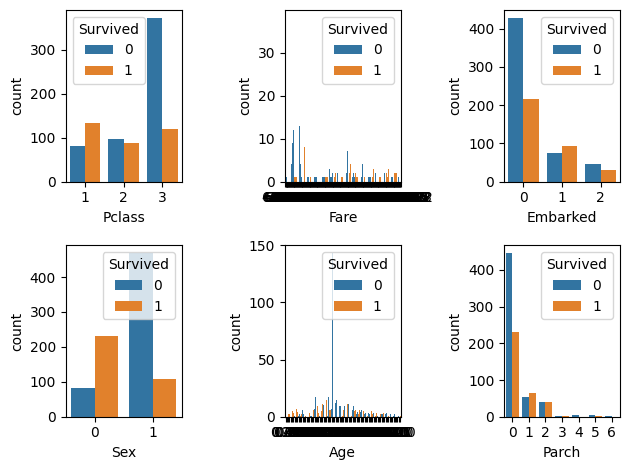

In [91]:
# Select 3 fetures:  1. "Sex" - 0.11 ;   2. "Age" - 0,34; 3. FARE
fig, ax = plt.subplots(2,3)
sns.countplot(data=df_train, x="Pclass", hue="Survived", ax=ax[0][0])
sns.countplot(data=df_train, x="Fare", hue="Survived", ax=ax[0][1])
sns.countplot(data=df_train, x="Embarked", hue="Survived", ax=ax[0][2])
sns.countplot(data=df_train, x="Sex", hue="Survived", ax=ax[1][0])
sns.countplot(data=df_train, x="Age", hue="Survived", ax=ax[1][1])
sns.countplot(data=df_train, x="Parch", hue="Survived", ax=ax[1][2])
plt.tight_layout()


In [92]:
df.Age.value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

### Separate the training data from TEST DATA

In [93]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [120]:
X = df.drop('Survived', axis=1)
X
y=df.Survived
y
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
X_train.head()


666
223
666
223


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
377,3,0,22.0,0,0,7.2500,0
459,2,0,50.0,0,0,10.5000,0
733,2,1,28.0,0,0,0.0000,0
508,1,1,28.0,0,0,26.5500,0
831,3,0,15.0,1,0,14.4542,1


In [42]:
# X_train, X_test, y_train, y_test = train_test_split(
#     df_train.drop('Survived',axis=1),
#     df_train['Survived'],
#     random_state=42)

# print(f'X_train shape: {X_train.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'y_test shape: {y_test.shape}')

X_train shape: (668, 8)
X_test shape: (223, 8)
y_train shape: (668,)
y_test shape: (223,)


In [95]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn_v1 = KNeighborsClassifier(n_neighbors=3)
knn_v1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# ПРОВЕРКА НА ТОЧНОСТТА НА МОДЕЛА

In [97]:
knn_v1.score(X_test, y_test)

0.6995515695067265

In [104]:
knn_v2 = KNeighborsClassifier(n_neighbors=11)
knn_v2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [105]:
knn_v2.score(X_test, y_test)

0.7533632286995515

In [110]:
knn_v3 = KNeighborsClassifier(n_neighbors=11)
knn_v3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [111]:
knn_v3.score(X_test, y_test)

0.7533632286995515

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
y_pred_1 = knn_v1.predict(X_test)
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_1

array([[113,  28],
       [ 39,  43]], dtype=int64)

Text(45.722222222222214, 0.5, 'True')

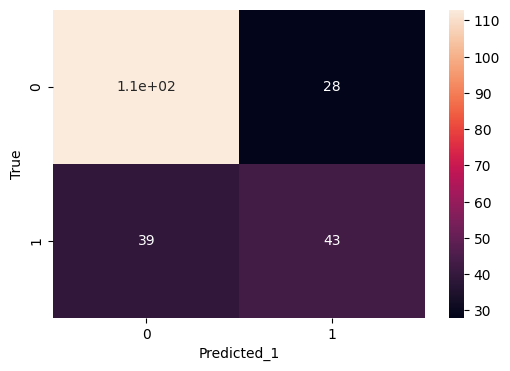

In [117]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_1, annot=True)
plt.xlabel('Predicted_1')
plt.ylabel('True')

In [118]:
y_pred_3 = knn_v3.predict(X_test)
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_3

array([[119,  22],
       [ 33,  49]], dtype=int64)

Text(33.22222222222222, 0.5, 'True')

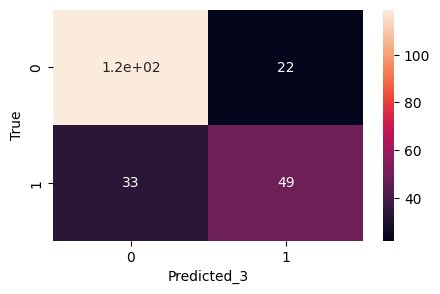

In [119]:
plt.figure(figsize=(5,3))
sns.heatmap(cm_3, annot=True)
plt.xlabel('Predicted_3')
plt.ylabel('True')

In [121]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       141
           1       0.61      0.52      0.56        82

    accuracy                           0.70       223
   macro avg       0.67      0.66      0.67       223
weighted avg       0.69      0.70      0.69       223



In [123]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       141
           1       0.69      0.60      0.64        82

    accuracy                           0.75       223
   macro avg       0.74      0.72      0.73       223
weighted avg       0.75      0.75      0.75       223



In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train, y_train)


RandomForestClassifier()

In [126]:
clf.score(X_test, y_test)


0.7757847533632287

In [127]:
y_pred_5 = clf.predict(X_test)
y_pred_5

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [128]:
y_pred_5 = clf.predict(X_test)
cm_5 = confusion_matrix(y_test, y_pred_5)
cm_5

array([[115,  26],
       [ 24,  58]], dtype=int64)

In [131]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       141
           1       0.69      0.71      0.70        82

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



Text(33.22222222222222, 0.5, 'True')

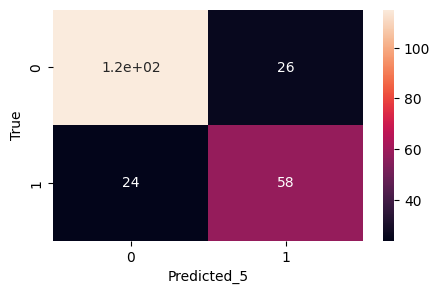

In [129]:
plt.figure(figsize=(5,3))
sns.heatmap(cm_5, annot=True)
plt.xlabel('Predicted_5')
plt.ylabel('True')